# <span style='color:SteelBlue'>PB5 - Segmentation_clients_e-commerce (part 1)</span>

<img src="https://asset.brandfetch.io/idvSn4Org5/idCJV4h5Ot.png" width="400" height="400">

# <span style='background:white; color:black'>Sommaire</span>

Importations des librairies utilisees dans ce notebook <br>

Paramètres d'affichage du notebook <br>

Fonctions utilisees dans ce notebook <br>

Importation des données <br>

**Etape 1 : Description des donnees**
- _1/ Les clients_
- _2/ Les geolocalisations_
- _3/ Les articles_
- _4/ Les paiements_
- _5/ Les avis_
- _6/ Les donnees de base_
- _7/ Les produits_
- _8/ Les vendeurs_
- _9/ Les traductions_

**Etape 2 : Nettoyage des donnees**
- _1/ RGPD_
- _2/ Selection des fichiers et features pertinentes_
- _3/ Nettoyage fichier "client"_
- _4/ Nettoyage fichier "article"_
- _5/ Nettoyage fichier "paiement"_
- _6/ Nettoyage fichier "avis"_
- _7/ Nettoyage fichier "donnees de base"_
- _8/ Fusion des fichiers_
- _9/ Bilan du dataframe fusionne_
- _10/ Segmentation RFM+S_

**Etape 3 : Analyse exploratoire**
- _1/ Analyses univariees_
- _2/ Analyses bivariees_
- _3/ Analyses multivariees_

**Etape 4 : Exportation du dataset nettoye**

Conclusion

# <span style='background:blue'>Introduction</span>

Olist souhaite que nous fournissons à ses equipes d'e-commerce une
segmentation des clients qu’elles pourront utiliser au quotidien pour leurs
campagnes de communication.

Nous devons fournir à l’equipe Marketing une description actionnable de notre
segmentation et de sa logique sous-jacente pour une utilisation optimale,
ainsi qu’une proposition de contrat de maintenance basée sur une analyse de
la stabilité des segments au cours du temps.
___

**Mission**

**Realiser la segmentation des clients en utilisant des methodes non-superviseees**.
Notre objectif est de comprendre les differents types d’utilisateurs grâce à
leur comportement et à leurs donnees personnelles. Pour cela nous devons :
1. Realiser une courte analyse exploratoire.
2. Tester differents modèles de segmentation afin de repondre au mieux à la
problematique.
3. Creer une proposition de contrat de maintenance basee sur une analyse de la
stabilite des segments au cours du temps.

Ce notebook presente la 1ère partie. Nous allons donc realiser
**une courte analyse exploratoire** après avoir nettoye les donnees si
necessaire. Le but sera de determiner les variables pertinentes ou d'en creer
de nouvelles (feature engineering).
___

**Source des datasets**<br>
Olist nous fournit une base de donnees anonymisee comportant des informations
sur l’historique de commandes, les produits achetes, les commentaires de
satisfaction, et la localisation des clients depuis janvier 2017.

Source : [Brazilian E-Commerce Public Dataset by Olist](https://www.kaggle.com/olistbr/brazilian-ecommerce)<br>

9 fichiers CSV :
- olist_customers_dataset.csv
- olist_geolocation_dataset.csv
- olist_order_items_dataset.csv
- olist_order_payments_dataset.csv
- olist_order_reviews_dataset.csv
- olist_orders_dataset.csv
- olist_products_dataset.csv
- olist_sellers_dataset.csv
- product_category_name_translation.csv

Relations entre les fichiers CSV :
<br><br>
<img src="https://i.imgur.com/HRhd2Y0.png" width="800" height="500">

<br>
Pour info, voici la segmentation RFM realisee par notre predecesseur il y a
quelques annees :
<br><br>
<img src="https://user.oc-static.com/upload/2023/03/21/16793895608947_Screenshot%202023-03-21%20at%2010.05.50.png" width="600" height="300">
___

**RAPPEL : PEP 8**<br>

Voici les règles de base à respecter pour que votre code soit PEP 8 compliant :
- Indentation : 4 espaces par niveau d’indentation (pas de tabulations)
- Importations : une ligne par librairie importee en haut du fichier
- Nommage des variables : en minuscules, avec des underscores pour separer les
mots
- Gestion des espaces : espacement des operateurs avant et après, pas
d'espacement devant ni à l'interieur des crochets
- Longueur des lignes : maximum 79 caractères
- Lignes vides : separer les fonctions et les classes par 2 lignes vides, les
methodes par 1 ligne vide
- Commentaires : en anglais ou français, au dessus de la ligne de code
concernee, pas de commentaires en fin de ligne

Source : https://python.sdv.univ-paris-diderot.fr/15_bonnes_pratiques/

**Pour obtenir le score PEP8, lancer cette ligne de code dans le**
**terminal VSC :<br>**
pylint Berthe_Pierrick_1_notebook_exploration_112023.ipynb

**Pour nettoyer automatiquement le code en utilisant le PEP8, lancer cette**
**ligne de code dans le terminal VSC :<br>**
autopep8 --in-place --aggressive --aggressive Berthe_Pierrick_1_notebook_exploration_112023.ipynb<br>
*(/!\ Ne fonctionne pas avec un Notebook Jupyter /!\\)*

Source : https://pypi.org/project/autopep8/

<div class="alert alert-block alert-warning">
<b>Formattage du notebook au PEP8 => lancer cette ligne de code dans le
terminal VSC : </b><br>
nbqa black Berthe_Pierrick_1_notebook_exploration_112023.ipynb</div>

# <span style='background:grey'>Importations des librairies utilisees dans ce notebook</span>

In [608]:
# Librairies
import os.path
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd
import seaborn as sns
import numpy as np
import time
from IPython.display import display
import scipy
from scipy.stats import shapiro
from datetime import datetime

# Affichage plot dans le notebook
%matplotlib inline

# Versions
print("Version des librairies utilisees :")
print("Python        : " + sys.version)
print("Matplotlib    : " + mpl.__version__)
print("NumPy         : " + np.version.full_version)
print("Pandas        : " + pd.__version__)
print("Scipy         : " + scipy.__version__)
print("Seaborn       : " + sns.__version__)

# Afficher heure lancement
maintenant = datetime.now().isoformat()
print("\nCode lance le : " + maintenant)

# Enregistrer l'heure de debut
start_time = time.time()

# Activer la verification PEP8
print("")
%reload_ext pycodestyle_magic
%pycodestyle_on

Version des librairies utilisees :
Python        : 3.11.7 (tags/v3.11.7:fa7a6f2, Dec  4 2023, 19:24:49) [MSC v.1937 64 bit (AMD64)]
Matplotlib    : 3.8.2
NumPy         : 1.26.2
Pandas        : 2.1.4
Scipy         : 1.11.4
Seaborn       : 0.13.0

Code lance le : 2023-12-22T12:16:34.391981



# <span style='background:grey'>Paramètres d'affichage du notebook</span>

In [609]:
# parametrage des paramètres d'affichage dans le notebook (pour afficher les
# definitions des indicateurs)
pd.set_option("display.max_row", 100)
pd.set_option("display.max_column", 100)
pd.set_option("display.precision", 5)

# Creation d'1 palette de couleurs
colors_list = [
    "Gold",
    "MediumPurple",
    "DarkOrange",
    "LimeGreen",
    "Tomato",
    "SteelBlue",
    "SaddleBrown",
    "DeepPink",
    "LightSkyBlue",
    "OliveDrab",
]

# Definit le style de la police pour le titre des graphiques
font_title = {
    "family": "Times New Roman",
    "color": "000000",  # Noir en notation hexadecimale
    "size": 22,
}

# Definit le style de la police pour les axes du graphique
font_axe = {
    "family": "Times New Roman",
    "color": "000000",  # Noir en notation hexadecimale
    "size": 16,
}

# <span style='background:grey'>Fonctions utilisees dans ce notebook</span>

In [610]:
#                          AFFICHE APERCU DF
# ****************************************************************************

def affiche_aperçu_df(df: pd.DataFrame, str_df, str_explication, nb_head):
    """
    Procedure qui affiche un aperçu d'un dataframe

    :param: df : data frame à analyser (df)
    :param: str_df : nom du data frame à analyser (str)
    :param: str_explication : explication de la modification (str)
    :param: nb_head : nombre de ligne pour la methode 'head' (int)
    """

    # Affichage du nom du dataframe et de l'explication
    print("Voici l'aspect de '{0}' après {1}".format(str_df, str_explication))

    # Affichage des x premières lignes du dataframe
    display(df.head(nb_head))

    # Affichage dimension du dataframe (ligne et col)
    dim = df.shape
    print("{0} ligne(s) x {1} colonne(s)\n".format(str(dim[0]), str(dim[1])))

In [611]:
# #                            PLOT DISTRIBUTION
# # ***************************************************************************

def plot_distribution(
    df,
    col,
    color,
    binwidth=None,
    shapiro_wilk=False,
    unit=None
):
    """
    Procedure qui affiche la distribution de la colonne sous forme
    d'histogramme et une boîte à moustaches.

    :param df: data frame à analyser (df)
    :param col: nom de la colonne (str)
    :param color: couleur pour l'histogramme (str)
    :param binwidth: largeur des barres de l'histogramme (int or float)
    (optionnel)
    :param shapiro_wilk: Effectuer le test de Shapiro-Wilk (booleen)
    (optionnel)
    :param unit: Unites pour l'axe X (str) (optionnel)
    """

    # Creation de sous-plots pour l'histogramme et la boîte à moustaches
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # SI le test de Shapiro-Wilk est effectue
    if shapiro_wilk:

        # Effectuez test de S-W et ecrire le resultat dans le titre du grap
        sw_statistic, p_value = shapiro(df[col])
        sw_texte = (
            f"Distribution '{col}' Test S-W :{sw_statistic:.2f} "
            f"/ p-value = {p_value:.2f}"
        )
        axes[0].set_title(sw_texte, fontdict=font_title, fontsize=14)
    else:
        # SI pas de test de Shapiro-Wilk, affichage titre par defaut
        axes[0].set_title(f"Distribution '{col}'", fontdict=font_title)

    # Graphique de l'histogramme
    if binwidth is not None:
        sns.histplot(
            df[col],
            kde=False,
            color=color,
            binwidth=binwidth,
            ax=axes[0]
        )
    else:
        sns.histplot(df[col], kde=False, color=color, ax=axes[0])

    # Étiquetage de l'axe X avec les unites (si specifiees)
    if unit:
        axes[0].set_xlabel("{0}".format(unit), fontdict=font_axe)
    else:
        axes[0].set_xlabel("Valeur", fontdict=font_axe)

    # Graphique de la boîte à moustaches
    sns.boxplot(x=df[col], color=color, ax=axes[1])
    axes[1].set_title("Boxplot '{0}'".format(col), fontdict=font_title)

    # Étiquetage de l'axe X avec les unites (si specifiees)
    if unit:
        axes[1].set_xlabel("{0}".format(unit), fontdict=font_axe)
    else:
        axes[1].set_xlabel("Valeur", fontdict=font_axe)

    # Ajustement de l'espacement entre les sous-plots
    plt.tight_layout()

    # Affichage des graphiques
    plt.show()

In [612]:
# #                            CONVERTISSEUR STR TO DATETIME
# # ***************************************************************************

def convertisseur_str_to_datetime(datetime_string):
    """
    Convertit une chaîne de caractères representant une date et une
    heure en un objet datetime.

    Args:
        datetime_string (str): La chaîne de caractères à convertir,
        qui doit être au format "AAAA-MM-JJ HH:MM:SS".

    Returns:
        datetime.datetime: L'objet datetime correspondant à la chaîne
        de caractères donnee.
    """
    # Convertion de la chaîne de caractères en un objet datetime
    datetime_object = datetime.strptime(datetime_string, "%Y-%m-%d %H:%M:%S")

    # Outputs
    return datetime_object

In [613]:
# #                            PLOT DISTRIBUTION DATETIME
# # ***************************************************************************

def plot_distribution_datetime(df, datetime_col):
    """
    Procedure qui affiche les distributions des composants d'une donneee
    datetime dans un ensemble de sous-graphiques.

    Paramètres
    ----------
    df : pandas.DataFrame
        Le DataFrame contenant les donnees à tracer. Doit contenir les
        colonnes 'year', 'month', 'day', 'hour', 'minute' et 'second'.
    """
    # cree une copie du DataFrame
    df_copie = df.copy()

    # Extraire les composants de la date
    df_copie["year"] = df[datetime_col].dt.year
    df_copie["month"] = df[datetime_col].dt.month
    df_copie["day"] = df[datetime_col].dt.day
    df_copie["hour"] = df[datetime_col].dt.hour
    df_copie["minute"] = df[datetime_col].dt.minute
    df_copie["second"] = df[datetime_col].dt.second

    # Creation de subplots
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    # Ajouter un titre
    fig.suptitle(
        "Distribution des composants de la date et de l'heure",
        fontdict=font_title
    )

    # Convertir les etiquettes de l'axe x en entiers
    formatter = FuncFormatter(lambda x, pos: "%.0f" % x)
    axes[0, 0].xaxis.set_major_formatter(formatter)

    # Distribution des annees
    sns.histplot(df_copie["year"], kde=False, ax=axes[0, 0], color="blue")
    axes[0, 0].set_xlabel("Annee")

    # Reduire le nombre d'etiquettes sur l'axe x
    start, end = axes[0, 0].get_xlim()
    axes[0, 0].xaxis.set_ticks(np.arange(start, end, step=1))

    # Distribution des mois
    sns.histplot(df_copie["month"], kde=False, ax=axes[0, 1], color="green")
    axes[0, 1].set_xlabel("Mois")

    # Distribution des jours
    sns.histplot(df_copie["day"], kde=False, ax=axes[0, 2], color="red")
    axes[0, 2].set_xlabel("Jour")

    # Distribution des heures
    sns.histplot(df_copie["hour"], kde=False, ax=axes[1, 0], color="purple")
    axes[1, 0].set_xlabel("Heure")

    # Distribution des minutes
    sns.histplot(df_copie["minute"], kde=False, ax=axes[1, 1], color="orange")
    axes[1, 1].set_xlabel("Minute")

    # Distribution des secondes
    sns.histplot(df_copie["second"], kde=False, ax=axes[1, 2], color="pink")
    axes[1, 2].set_xlabel("Seconde")

    plt.tight_layout()
    plt.show()

In [614]:
# #                            AFFICHEUR DIMENSION ET UNIQUE
# # ***************************************************************************

def afficheur_dimension_et_unique(df, df_name, type_donnee, col_name):
    """
    Procedure qui affiche le nombre de lignes et de commandes differentes dans
    un DataFrame.

    Paramètres
    ----------
    df : pandas.DataFrame
        Le DataFrame pour lequel compter le nombre de lignes et de commandes
        differentes.
    df_name : str
        Le nom du DataFrame.
    col_name : str
        Le nom de la colonne pour laquelle compter le nombre de valeurs
        uniques.
    """
    # Afficher le nombre de lignes
    print(
        "'{0}' contient {1} lignes et {2} colonnes".format(
            df_name, df.shape[0], df.shape[1]
        )
    )

    # Afficher le nombre de 'type_donnee' differentes
    print(
        "'{0}' contient {1} {2} different(e)s".format(
            df_name, df[col_name].nunique(), type_donnee
        )
    )

In [615]:
# #                            CALCULER_DUREE_NOTEBOOK
# # ***************************************************************************

def calculer_duree_notebook(start_time):
    """
    Cette procedure calcule et affiche la duree totale depuis un temps de
    debut donne.

    Args:
        start_time (float): Le temps de debut en secondes depuis l'epoque.

    Returns:
        None
    """

    # Calculer la duree totale
    total_time = time.time() - start_time

    # Convertir en minutes et secondes
    minutes, seconds = divmod(total_time, 60)

    # Afficher la duree totale
    print(
        f"Duree totale pour faire tourner le notebook : "
        f"{int(minutes)} minute(s) {int(seconds)} seconde(s)"
    )

# <span style='background:grey'>Importation des donnees</span>

Importation des fichiers CSV avec Pandas

In [616]:
# Definir le chemin
chemin = "./data/source/"

# Obtenir une liste de tous les fichiers dans le repertoire
fichiers = os.listdir(chemin)

# Initialiser un dictionnaire vide et print de la liste des fichiers importe
data_brut = {}
print("===> Liste des fichiers importes: <====\n")

# Boucle sur chaque fichier
for fichier in fichiers:

    # Traiter uniquement les fichiers .csv
    if fichier.endswith(".csv"):
        print(fichier)

        # Lire le fichier csv et le stocker dans le dictionnaire
        data_brut[fichier] = pd.read_csv(
            chemin + fichier,
            sep=",",
            encoding="utf-8"
        )

===> Liste des fichiers importes: <====

olist_customers_dataset.csv
olist_geolocation_dataset.csv
olist_orders_dataset.csv
olist_order_items_dataset.csv
olist_order_payments_dataset.csv
olist_order_reviews_dataset.csv
olist_products_dataset.csv
olist_sellers_dataset.csv
product_category_name_translation.csv


# <span style='background:blue'>Etape 1 : Description des donnees</span>

## <span style='background:yellow; color:black'>1/ Les clients</span>

### <span style='background:green'>a/ Aperçu tableau</span>

In [617]:
# isoler le contenu du fichier
fichier = data_brut["olist_customers_dataset.csv"]

# Afficher les 3 premières lignes du fichier
fichier.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


Informations sur les clients :
- **customer_id** : identifiant des commandes
- **customer_unique_id** : identifiant des clients
- **customer_zip_code_prefix** : code postal du client (premiers chiffres uniquement)
- **customer_city** : ville du client
- **customer_state** : etat du client

### <span style='background:green'>b/ Structure</span>

In [618]:
fichier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Le fichier contient 99_441 lignes et 5 colonnes.

### <span style='background:green'>c/ Valeurs manquantes</span>

In [619]:
fichier.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Il n'y a pas de valeurs manquantes.

### <span style='background:green'>d/ Doublons</span>

In [620]:
fichier.duplicated().sum()

0

Il n'y a pas de doublons.

### <span style='background:green'>e/ Inspection des donnees</span>

Resume des features **quantitatives** :

In [621]:
fichier.describe().round(2)

,customer_zip_code_prefix
count,99441.00
mean,35137.47
std,29797.94
min,1003.00
25%,11347.00
50%,24416.00
75%,58900.00
max,99990.00


Resume des features **qualitatives** : 

In [622]:
fichier.describe(exclude=[np.number])

,customer_id,customer_unique_id,customer_city,customer_state
count,99441,99441,99441,99441
unique,99441,96096,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,SP
freq,1,17,15540,41746


<div class="alert alert-block alert-info">
<b>Fichier client </b> : 'olist_customers_dataset.csv' 
 
Ce fichier contient plus de 99_000 commandes avec plus de 96_000 clients
differents. Il y a moins de clients que de commandes. Certains clients ont
donc passe plusieurs commandes (env. 3%).

Ce fichier est lie au fichier des **geolocalisations** grâce à la clef
"**customer_zip_code_prefix**".<br>
Ce fichier est lie au fichier des **donnees de base** grâce à la clef
"**customer_id**". 
</div>

## <span style='background:yellow; color:black'>2/ les geolocalisations</span>

### <span style='background:green'>a/ Aperçu tableau</span>

In [623]:
# isoler le contenu du fichier
fichier = data_brut["olist_geolocation_dataset.csv"]

# Afficher les 3 premières lignes du fichier
fichier.head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.54562,-46.63929,sao paulo,SP
1,1046,-23.54608,-46.64482,sao paulo,SP
2,1046,-23.54613,-46.64295,sao paulo,SP


Informations sur la geolocalisation des clients :
- **geolocation_zip_code_prefix** : code postal du client (premiers chiffres uniquement)
- **geolocation_lat** : latitude du client
- **geolocation_lng** : longitude du client
- **geolocation_city** : ville d'habitation du client
- **geolocation_state** : etat d'habitation du client

### <span style='background:green'>b/ Structure</span>

In [624]:
fichier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


Il y a 1_000_163 lignes et 5 colonnes.

### <span style='background:green'>c/ Valeurs manquantes</span>

In [625]:
fichier.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Il n'y a pas de valeurs manquantes.

### <span style='background:green'>d/ Doublons</span>

In [626]:
fichier.duplicated().sum()

261831

Il y a 261_831 doublons de ligne identiques. 

### <span style='background:green'>e/ Inspection des donnees</span>

Resume des features **quantitatives** :

In [627]:
fichier.describe().round(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1000163.00,1000163.00,1000163.00
mean,36574.17,-21.18,-46.39
std,30549.34,5.72,4.27
min,1001.00,-36.61,-101.47
25%,11075.00,-23.60,-48.57
50%,26530.00,-22.92,-46.64
75%,63504.00,-19.98,-43.77
max,99990.00,45.07,121.11


Resume des features **qualitatives** : 

In [628]:
fichier.describe(exclude=[np.number])

,geolocation_city,geolocation_state
count,1000163,1000163
unique,8011,27
top,sao paulo,SP
freq,135800,404268


<div class="alert alert-block alert-info">
<b>Fichier geolocalisation </b> : 'olist_geolocation_dataset.csv'

Ce fichier presente plus d'un million de lignes sans aucune valeur manquante
concernant la localisation des clients. Les commandes ont ete realisees dans
plus de 8_000 villes differentes dans 27 etats differents. 

Ce fichier est lie au fichier des **clients** grâce à la clef
"**geolocation_zip_code_prefix**".<br>
Ce fichier est lie au fichier des **vendeurs** grâce à la clef
"**geolocation_zip_code_prefix**". 
</div>

## <span style='background:yellow; color:black'>3/ Les articles</span>

### <span style='background:green'>a/ Aperçu tableau</span>

In [629]:
# isoler le contenu du fichier
fichier = data_brut["olist_order_items_dataset.csv"]

# Afficher les 3 premières lignes du fichier
fichier.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


Informations sur les articles :
- **order_id** : identifiant des commandes
- **order_item_id** : nombre d'articles commandes
- **product_id** : identifiant des produits
- **seller_id** : identifiant des vendeurs
- **shipping_limit_date** : date limite d'envoi
- **price** : prix
- **freight_value** : valeur du fret

### <span style='background:green'>b/ Structure</span>

In [630]:
fichier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Ce fichier contient 112_650 lignes et 7 colonnes.

### <span style='background:green'>c/ Valeurs manquantes</span>

In [631]:
fichier.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Il n'y a pas de valeurs manquantes.

### <span style='background:green'>d/ Doublons</span>

In [632]:
fichier.duplicated().sum()

0

Il n'y a pas de doublons.

### <span style='background:green'>e/ Inspection des donnees</span>

Resume des features **quantitatives** :

In [633]:
fichier.describe().round(2)

,order_item_id,price,freight_value
count,112650.00,112650.00,112650.00
mean,1.20,120.65,19.99
std,0.71,183.63,15.81
min,1.00,0.85,0.00
25%,1.00,39.90,13.08
50%,1.00,74.99,16.26
75%,1.00,134.90,21.15
max,21.00,6735.00,409.68


Resume des features **qualitatives** : 

In [634]:
fichier.describe(exclude=[np.number])

,order_id,product_id,seller_id,shipping_limit_date
count,112650,112650,112650,112650
unique,98666,32951,3095,93318
top,8272b63d03f5f79c56e9e4120aec44ef,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23
freq,21,527,2033,21


<div class="alert alert-block alert-info">
<b>Fichier article </b> : 'olist_order_items_dataset.csv'

Ce fichier contient plus de 112_000 commandes avec plus de 32_000 produits
differents pour plus de 3_000 vendeurs differents.<br>
La commande moyenne contient 1,2 article pour 120 R$ (Real bresilien) de prix
et 20 R$ de frais de port.

Ce fichier est lie au fichier des **commandes** grâce à la clef
"**order_id**".<br>
Ce fichier est lie au fichier des **produits** grâce à la clef
"**product_id**".<br>
Ce fichier est lie au fichier des **vendeurs** grâce à la clef
"**seller_id**".
</div>

## <span style='background:yellow; color:black'>4/ Les paiements</span>

### <span style='background:green'>a/ Aperçu tableau</span>

In [635]:
# isoler le contenu du fichier
fichier = data_brut["olist_order_payments_dataset.csv"]

# Afficher les 3 premières lignes du fichier
fichier.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


Informations sur les paiements :
- **order_id** : identifiant des commandes
- **payment_sequential** : nombre de sequence de paiements pour differents modes de paiement
- **payment_type** : type de paiement
- **payment_installments** : nombre de versement de paiement
- **payment_value** : montant du paiement

### <span style='background:green'>b/ Structure</span>

In [636]:
fichier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Ce fichier contient 103_886 lignes et 5 colonnes.

### <span style='background:green'>c/ Valeurs manquantes</span>

In [637]:
fichier.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Il n'y a pas de valeurs manquantes.

### <span style='background:green'>d/ Doublons</span>

In [638]:
fichier.duplicated().sum()

0

Il n'y a pas de doublons.

### <span style='background:green'>e/ Inspection des donnees</span>

Resume des features **quantitatives** :

In [639]:
fichier.describe().round(2)

,payment_sequential,payment_installments,payment_value
count,103886.00,103886.00,103886.00
mean,1.09,2.85,154.10
std,0.71,2.69,217.49
min,1.00,0.00,0.00
25%,1.00,1.00,56.79
50%,1.00,1.00,100.00
75%,1.00,4.00,171.84
max,29.00,24.00,13664.08


Resume des features **qualitatives** : 

In [640]:
fichier.describe(exclude=[np.number])

,order_id,payment_type
count,103886,103886
unique,99440,5
top,fa65dad1b0e818e3ccc5cb0e39231352,credit_card
freq,29,76795


<div class="alert alert-block alert-info">
<b>Fichier paiement </b> : 'olist_order_payments_dataset.csv'

Ce fichier contient plus de 103_000 paiements pour plus de 99_000 commandes
differentes.<br>
Le paiement moyen comporte 1,09 sequence avec 2,85 versements pour un montant
de 154 R$.<br>
Il y a 5 types de paiements differents.

Ce fichier est lie au fichier des **donnees de base** grâce à la clef
"**order_id**".
</div>

## <span style='background:yellow; color:black'>5/ Les avis</span>

### <span style='background:green'>a/ Aperçu tableau</span>

In [641]:
# isoler le contenu du fichier
fichier = data_brut["olist_order_reviews_dataset.csv"]

# Afficher les 3 premières lignes du fichier
fichier.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


Informations sur les avis :
- **review_id** : identifiant des avis
- **order_id** : identifiant des commandes
- **review_score** : score/note de l'avis
- **review_comment_title** : titre de l'avis
- **review_comment_message** : message de l'avis
- **review_creation_date** : date de creation de l'avis
- **review_answer_timestamp** : date de reponse de l'avis

### <span style='background:green'>b/ Structure</span>

In [642]:
fichier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


Ce fichier contient 99_224 lignes et 7 colonnes.

### <span style='background:green'>c/ Valeurs manquantes</span>

In [643]:
fichier.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Il y a 87_656 valeurs manquantes dans la colonne "**review_comment_title**".<br>
Il y a 58_247 valeurs manquantes dans la colonne "**review_comment_message**".

### <span style='background:green'>d/ Doublons</span>

In [644]:
fichier.duplicated().sum()

0

Il n'y a pas de doublons.

### <span style='background:green'>e/ Inspection des donnees</span>

Resume des features **quantitatives** :

In [645]:
fichier.describe().round(2)

,review_score
count,99224.00
mean,4.09
std,1.35
min,1.00
25%,4.00
50%,5.00
75%,5.00
max,5.00


Resume des features **qualitatives** : 

In [646]:
fichier.describe(exclude=[np.number])

,review_id,order_id,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,11568,40977,99224,99224
unique,98410,98673,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,423,230,463,4


<div class="alert alert-block alert-info">
<b>Fichier avis </b> : 'olist_order_reviews_dataset.csv'

Ce fichier contient plus de 99_000 avis pour plus de 98_000 commandes
differentes.<br>
La note moyenne etait de 4,09 /5.<br>
Seulement 41_000 avis possèdent un message et 11_500 avis possèdent un titre.

Ce fichier est lie au fichier des **donnees de base** grâce à la clef
"**order_id**".
</div>

## <span style='background:yellow; color:black'>6/ Les donnees de base</span>

### <span style='background:green'>a/ Aperçu tableau</span>

In [647]:
# isoler le contenu du fichier
fichier = data_brut["olist_orders_dataset.csv"]

# Afficher les 3 premières lignes du fichier
fichier.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


Informations sur les donnees de base :
- **order_id** : identifiant des commandes
- **customer_id** : identifiant des clients
- **order_status** : statut de la commande
- **order_purchase_timestamp** : date d'achat de la commande
- **order_approved_at** : date d'approbation du paiement de la commande
- **order_delivered_carrier_date** : date de prise en charge de la commande par le transporteur
- **order_delivered_customer_date** : date de livraison de la commande au client
- **order_estimated_delivery_date** : date estimee de livraison de la commande

### <span style='background:green'>b/ Structure</span>

In [648]:
fichier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Ce fichier contient 99_441 lignes et 8 colonnes.

### <span style='background:green'>c/ Valeurs manquantes</span>

In [649]:
fichier.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Il y a 160 valeurs manquantes dans la colonne "**order_approved_at**".<br>
Il y a 1_783 valeurs manquantes dans la colonne "**order_delivered_carrier_date**".<br>
Il y a 2_965 valeurs manquantes dans la colonne "**order_delivered_customer_date**".

### <span style='background:green'>d/ Doublons</span>

In [650]:
fichier.duplicated().sum()

0

Il n'y a pas de doublons.

### <span style='background:green'>e/ Inspection des donnees</span>

Resume des features **qualitatives** : 

In [651]:
fichier.describe(exclude=[np.number])

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


<div class="alert alert-block alert-info">
<b>Fichier donnees de base </b> : 'olist_orders_dataset.csv'

Ce fichier contient des donnees de base pour plus de 99_000 commandes de
99_000 clients.<br>
Seulement 96_000 commandes ont ete livrees.<br>
Il manque 160 dates d'approbation de paiement, 1_783 dates de prise en charge
par le transporteur et 2_965 dates de livraison au client.

Ce fichier est lie au fichier des **paiements** grâce à la clef
"**order_id**".<br>
Ce fichier est lie au fichier des **avis** grâce à la clef "**order_id**".<br>
Ce fichier est lie au fichier des **articles** grâce à la clef
"**order_id**".<br>
Ce fichier est lie au fichier des **clients** grâce à la clef
"**customer_id**".
</div>

## <span style='background:yellow; color:black'>7/ Les produits</span>

### <span style='background:green'>a/ Aperçu tableau</span>

In [652]:
# isoler le contenu du fichier
fichier = data_brut["olist_products_dataset.csv"]

# Afficher les 3 premières lignes du fichier
fichier.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


Informations sur les produits :
- **product_id** : identifiant des produits
- **product_category_name** : categorie des produits
- **product_name_lenght** : longueur du nom du produit
- **product_description_lenght** : longueur de la description du produit
- **product_photos_qty** : nombre de photos du produit
- **product_weight_g** : poids du produit (en g)
- **product_length_cm** : longueur du produit (en cm)
- **product_height_cm** : hauteur du produit (en cm)
- **product_width_cm** : largeur du produit (en cm)

### <span style='background:green'>b/ Structure</span>

In [653]:
fichier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Ce fichier contient 32_951 lignes et 9 colonnes.

### <span style='background:green'>c/ Valeurs manquantes</span>

In [654]:
fichier.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Il y a 610 valeurs manquantes dans la colonne "**product_category_name**",
"**product_name_lenght**", "**product_description_lenght**" et "**product_photos_qty**".<br>

Il y a 2 valeurs manquantes dans la colonne "**product_weight_g**",
"**product_length_cm**", "**product_height_cm**" et "**product_width_cm**".

### <span style='background:green'>d/ Doublons</span>

In [655]:
fichier.duplicated().sum()

0

Il n'y a pas de doublons.

### <span style='background:green'>e/ Inspection des donnees</span>

Resume des features **quantitatives** :

In [656]:
fichier.describe().round(2)

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.00,32341.00,32341.00,32949.00,32949.00,32949.00,32949.00
mean,48.48,771.50,2.19,2276.47,30.82,16.94,23.20
std,10.25,635.12,1.74,4282.04,16.91,13.64,12.08
min,5.00,4.00,1.00,0.00,7.00,2.00,6.00
25%,42.00,339.00,1.00,300.00,18.00,8.00,15.00
50%,51.00,595.00,1.00,700.00,25.00,13.00,20.00
75%,57.00,972.00,3.00,1900.00,38.00,21.00,30.00
max,76.00,3992.00,20.00,40425.00,105.00,105.00,118.00


Resume des features **qualitatives** : 

In [657]:
fichier.describe(exclude=[np.number])

,product_id,product_category_name
count,32951,32341
unique,32951,73
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho
freq,1,3029


<div class="alert alert-block alert-info">
<b>Fichier produits </b> : 'olist_products_dataset.csv'

Ce fichier contient plus de 32_000 produits dans 73 categories differentes.<br>
Il y a 610 produits sans categorie, nom, description ou photo.<br>
Il y a 2 produits sans dimension ni poids.<br>

Le produit moyen pèse 2,276 kg pour une dimension de 31 x 17 x23 cm. Il est
decrit avec un titre de 48 caractères et une description de 771 caractères
avec 2 photos.<br>


Ce fichier est lie au fichier des **articles** grâce à la clef "**product_id**".
</div>

## <span style='background:yellow; color:black'>8/ Les vendeurs</span>

### <span style='background:green'>a/ Aperçu tableau</span>

In [658]:
# isoler le contenu du fichier
fichier = data_brut["olist_sellers_dataset.csv"]

# Afficher les 3 premières lignes du fichier
fichier.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


Informations sur les vendeurs :
- **seller_id** : identifiant des vendeurs
- **seller_zip_code_prefix** : code postal du vendeur (5 premiers chiffres uniquement)
- **seller_city** : ville de domiciliation du vendeur
- **seller_state** : etat domiciliation du vendeur

### <span style='background:green'>b/ Structure</span>

In [659]:
fichier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Ce fichier contient 3_095 lignes et 4 colonnes.

### <span style='background:green'>c/ Valeurs manquantes</span>

In [660]:
fichier.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Il n'y a pas de valeurs manquantes.

### <span style='background:green'>d/ Doublons</span>

In [661]:
fichier.duplicated().sum()

0

Il n'y a pas de doublons.

### <span style='background:green'>e/ Inspection des donnees</span>

Resume des features **quantitatives** :

In [662]:
fichier.describe().round(2)

,seller_zip_code_prefix
count,3095.00
mean,32291.06
std,32713.45
min,1001.00
25%,7093.50
50%,14940.00
75%,64552.50
max,99730.00


Resume des features **qualitatives** : 

In [663]:
fichier.describe(exclude=[np.number])

,seller_id,seller_city,seller_state
count,3095,3095,3095
unique,3095,611,23
top,3442f8959a84dea7ee197c632cb2df15,sao paulo,SP
freq,1,694,1849


<div class="alert alert-block alert-info">
<b>Fichier vendeur </b> : 'olist_sellers_dataset.csv'

Ce fichier contient plus de 3_000 vendeurs dans 611 villes de 23 etats.<br>

Ce fichier est lie au fichier des **articles** grâce à la clef
"**seller_id**".<br>
Ce fichier est lie au fichier des **geolocalisations** grâce à la clef
"**seller_zip_code_prefix**".
</div>

## <span style='background:yellow; color:black'>9/ Les traductions</span>

### <span style='background:green'>a/ Aperçu tableau</span>

In [664]:
# isoler le contenu du fichier
fichier = data_brut["product_category_name_translation.csv"]

# Afficher les 3 premières lignes du fichier
fichier.head(3)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


Informations sur les traductions :
- **product_category_name** : categorie des produits en portugais
- **product_category_name_english** : categorie des produits en anglais

### <span style='background:green'>b/ Structure</span>

In [665]:
fichier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


Ce fichier contient 71 lignes et 2 colonnes.

### <span style='background:green'>c/ Valeurs manquantes</span>

In [666]:
fichier.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

Il n'y a pas de valeurs manquantes.

### <span style='background:green'>d/ Doublons</span>

In [667]:
fichier.duplicated().sum()

0

Il n'y a pas de doublons.

### <span style='background:green'>e/ Inspection des donnees</span>

Resume des features **qualitatives** :

In [668]:
fichier.describe(exclude=[np.number])

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


<div class="alert alert-block alert-info">
<b>Fichier traduction </b> : 'product_category_name_translation.csv'

Ce fichier contient 71 traductions de categories en portugais et en
anglais.<br>
</div>

# <span style='background:blue'>Etape 2 : Nettoyage des donnees</span>

## <span style='background:yellow; color:black'>1/ RGPD</span>

Avant toute utilisation des donnees personnelles des clients, nous devons nous
assurer que nous respectons l'equivalent du RGPD au bresil : LGPD (_Lei Geral
de Proteção de Dados_).

**Cette etape n'est pas realisee dans ce notebook puisque c'est un notebook**
**non cleane qui n'est pas à destination du client.** 
Mais ce travail sera à realiser lors du notebook à fournir au client.

## <span style='background:yellow; color:black'>2/ Selection des fichiers et features pertinentes</span>

Consignes du client Olist :<br>
_"La segmentation proposee des differents types de clients doit pouvoir au
minimum pouvoir differencier les bons et moins bons clients en termes de
commandes et de satisfaction. Il faut se concentrer sur les 3% des clients
qui ont realises plusieurs commandes mais la segmentation doit être fait sur
l'ensemble des clients."_

Nous allons selectionner les fichiers du dataset pertinents pour notre
analyse, à savoir les fichiers concernant : 

- Les clients
- Les articles
- Les paiements
- Les avis
- Les donnees de base

In [669]:
# Importation des fichiers retenus
df_clients = data_brut["olist_customers_dataset.csv"]
df_articles = data_brut["olist_order_items_dataset.csv"]
df_paiements = data_brut["olist_order_payments_dataset.csv"]
df_avis = data_brut["olist_order_reviews_dataset.csv"]
df_base = data_brut["olist_orders_dataset.csv"]

## <span style='background:yellow; color:black'>3/ Nettoyage fichier "client"</span>

### <span style='background:black; color:white'>a/ Selection des features à conserver</span>

- **customer_id** : identifiant des commandes
- **customer_unique_id** : identifiant des clients

In [670]:
# Feature à conserver
feat_a_garder = ["customer_id", "customer_unique_id"]

# Selection des features à conserver
df_clients_clean = df_clients[feat_a_garder]

### <span style='background:black; color:white'>b/ Imputation valeurs manquantes</span>

Pas de valeur manquante.

### <span style='background:black; color:white'>c/ Gestion des outliers</span>

Pas neccessaire ici car ce ne sont que des donnees qualitatives. 

### <span style='background:black; color:white'>d/ Aperçu dataframe nettoye</span>

In [671]:
affiche_aperçu_df(df_clients_clean, "df_clients_clean", "nettoyage", 3)

Voici l'aspect de 'df_clients_clean' après nettoyage


,customer_id,customer_unique_id
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e


99441 ligne(s) x 2 colonne(s)



## <span style='background:yellow; color:black'>4/ Nettoyage fichier "article"</span>

### <span style='background:black; color:white'>a/ Selection des features à conserver</span>

- **order_id** : identifiant des commandes
- **order_item_id** : nombre d'articles commandes
- **price** : prix
- **freight_value** : valeur du fret

In [672]:
# Feature à conserver
feat_a_garder = ["order_id", "order_item_id", "price", "freight_value"]

# Selection des features à conserver
df_articles_clean = df_articles[feat_a_garder]

### <span style='background:black; color:white'>b/ Imputation valeurs manquantes</span>

Pas de valeur manquante.

### <span style='background:black; color:white'>c/ Gestion des outliers</span>

Pas neccesaire pour "order_id" car ce sont des donnees qualitatives.<br>

Verifions les donnees quantitatives :

In [673]:
df_articles_clean.describe().round(2)

,order_item_id,price,freight_value
count,112650.00,112650.00,112650.00
mean,1.20,120.65,19.99
std,0.71,183.63,15.81
min,1.00,0.85,0.00
25%,1.00,39.90,13.08
50%,1.00,74.99,16.26
75%,1.00,134.90,21.15
max,21.00,6735.00,409.68


Les donnees quantitatives sont toutes positives et avec des ordres de grandeur probables. Il n'y a donc pas de valeurs aberrantes.

### <span style='background:black; color:white'>d/ Aperçu dataframe nettoye</span>

In [674]:
affiche_aperçu_df(df_articles_clean, "df_articles_clean", "nettoyage", 3)

Voici l'aspect de 'df_articles_clean' après nettoyage


,order_id,order_item_id,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,199.0,17.87


112650 ligne(s) x 4 colonne(s)



## <span style='background:yellow; color:black'>5/ Nettoyage fichier "paiements"</span>

### <span style='background:black; color:white'>a/ Selection des features à conserver</span>

- **order_id** : identifiant des commandes
- **payment_value** : montant du paiement

In [675]:
# Feature à conserver
feat_a_garder = ["order_id", "payment_value"]

# Selection des features à conserver
df_paiements_clean = df_paiements[feat_a_garder]

### <span style='background:black; color:white'>b/ Imputation valeurs manquantes</span>

Pas de valeur manquante.

### <span style='background:black; color:white'>c/ Gestion des outliers</span>

Pas necessaire pour "order_id" car ce sont des donnees qualitatives.<br>

Verifions les donnees quantitatives :

In [676]:
df_paiements_clean.describe().round(2)

,payment_value
count,103886.00
mean,154.10
std,217.49
min,0.00
25%,56.79
50%,100.00
75%,171.84
max,13664.08


Les donnees quantitatives sont toutes positives et avec des ordres de grandeur
probables. Il n'y a donc pas de valeurs aberrantes.

### <span style='background:black; color:white'>d/ Aperçu dataframe nettoye</span>

In [677]:
affiche_aperçu_df(df_paiements_clean, "df_paiements_clean", "nettoyage", 3)

Voici l'aspect de 'df_paiements_clean' après nettoyage


,order_id,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,65.71


103886 ligne(s) x 2 colonne(s)



## <span style='background:yellow; color:black'>6/ Nettoyage fichier "avis"</span>

### <span style='background:black; color:white'>a/ Selection des features à conserver</span>

- **order_id** : identifiant des commandes
- **review_score** : score/note de l'avis

In [678]:
# Feature à conserver
feat_a_garder = ["order_id", "review_score"]

# Selection des features à conserver
df_avis_clean = df_avis[feat_a_garder]

### <span style='background:black; color:white'>b/ Imputation valeurs manquantes</span>

Pas de valeur manquante.

### <span style='background:black; color:white'>c/ Gestion des outliers</span>

Pas neccesaire pour "order_id" car ce sont des donnees qualitatives.<br>

Verifions les donnees quantitatives :

In [679]:
df_avis_clean.describe().round(2)

,review_score
count,99224.00
mean,4.09
std,1.35
min,1.00
25%,4.00
50%,5.00
75%,5.00
max,5.00


Les donnees quantitatives sont toutes positives et avec des ordres de grandeur
probables. Il n'y a donc pas de valeurs aberrantes.

### <span style='background:black; color:white'>d/ Aperçu dataframe nettoye</span>

In [680]:
affiche_aperçu_df(df_avis_clean, "df_avis_clean", "nettoyage", 3)

Voici l'aspect de 'df_avis_clean' après nettoyage


,order_id,review_score
0,73fc7af87114b39712e6da79b0a377eb,4
1,a548910a1c6147796b98fdf73dbeba33,5
2,f9e4b658b201a9f2ecdecbb34bed034b,5


99224 ligne(s) x 2 colonne(s)



## <span style='background:yellow; color:black'>7/ Nettoyage fichier "donnees de base"</span>

### <span style='background:black; color:white'>a/ Selection des features à conserver</span>

- **order_id** : identifiant des commandes
- **customer_id** : identifiant des clients
- **order_purchase_timestamp** : date d'achat de la commande

In [681]:
# Feature à conserver
feat_a_garder = ["order_id", "customer_id", "order_purchase_timestamp"]

# Selection des features à conserver
df_base_clean_temp = df_base[feat_a_garder]

### <span style='background:black; color:white'>b/ Imputation valeurs manquantes</span>

Pas de valeur manquante.

### <span style='background:black; color:white'>c/ Gestion des outliers</span>

Pas neccesaire pour "order_id" et "customer_id" car ce sont des donnees
qualitatives.<br>

Concernant "order_purchase_timestamp", il faut d'abord convertir les donnees
en datetime puis verifier qu'il n'y a pas de valeurs aberrantes.

In [682]:
# Copie du dataframe
df_base_clean = df_base_clean_temp.copy()

# Conversion de la colonne 'order_purchase_timestamp' en datetime
df_base_clean["order_purchase_timestamp"] = df_base_clean[
    "order_purchase_timestamp"
].apply(convertisseur_str_to_datetime)

Nous pouvons desormais verifier la distribution des dates d'achat de commandes.

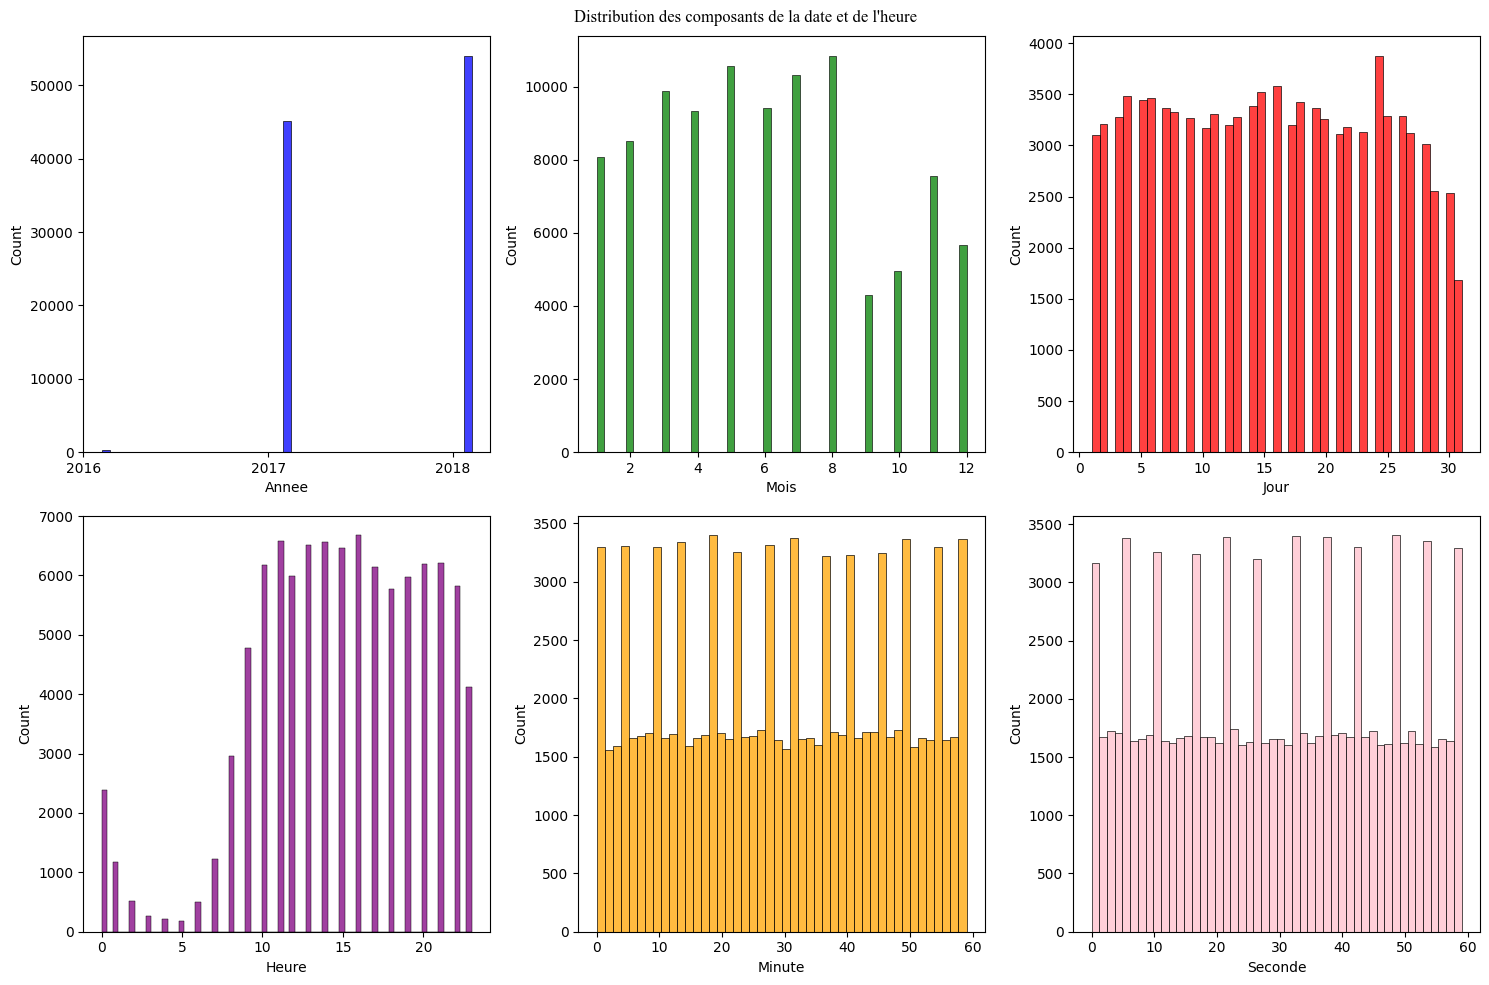

In [683]:
plot_distribution_datetime(df_base_clean, "order_purchase_timestamp")

Rien d'anormal. Il n'y a pas de valeurs aberrantes parmi les date et les heures. 

### <span style='background:black; color:white'>d/ Aperçu dataframe nettoye</span>

In [684]:
affiche_aperçu_df(df_base_clean, "df_base_clean", "nettoyage", 3)

Voici l'aspect de 'df_base_clean' après nettoyage


,order_id,customer_id,order_purchase_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49


99441 ligne(s) x 3 colonne(s)



## <span style='background:yellow; color:black'>8/ Fusion des fichiers</span>

### <span style='background:black; color:white'>a/ Donnees de base - client</span>

Nous commençons la fusion sur le fichier "df_base_clean" car sa position dans
la relation entre les fichiers est centrale, c'est à dire qu'il est lie à tous
les autres fichiers.

Tout d'abord, regardons sa feature 'customer_id' :

In [685]:
afficheur_dimension_et_unique(
    df_base_clean,
    "df_base_clean",
    "clients associes à autant de commande",
    "customer_id",
)

'df_base_clean' contient 99441 lignes et 3 colonnes
'df_base_clean' contient 99441 clients associes à autant de commande different(e)s


Nous allons lui fusionner le 'df_clients_clean' dont voici la feature
'customer_id' des commandes :

In [686]:
afficheur_dimension_et_unique(
    df_clients_clean,
    "df_clients_clean",
    "clients associes à autant de commande",
    "customer_id",
)

'df_clients_clean' contient 99441 lignes et 2 colonnes
'df_clients_clean' contient 99441 clients associes à autant de commande different(e)s


Nous realisons une jointure interne pour conserver les commandes presentes
dans les 2 fichiers.

In [687]:
# Fusionner les DataFrame
df_merged_client = pd.merge(
    df_base_clean, df_clients_clean, on="customer_id", how="inner"
)

Nous verifions que la fusion s'est bien deroulee :

In [688]:
afficheur_dimension_et_unique(
    df_merged_client, "df_merged_client", "commandes", "order_id"
)

'df_merged_client' contient 99441 lignes et 4 colonnes
'df_merged_client' contient 99441 commandes different(e)s


In [689]:
affiche_aperçu_df(
    df_merged_client,
    "df_merged_client",
    "fusion 'donnee de base - clients'",
    3
)

Voici l'aspect de 'df_merged_client' après fusion 'donnee de base - clients'


,order_id,customer_id,order_purchase_timestamp,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8


99441 ligne(s) x 4 colonne(s)



### <span style='background:black; color:white'>b/ Ajout des paiements</span>

Regardons les commandes ('order_id') dans le dataframe fusionne :

In [690]:
afficheur_dimension_et_unique(
    df_merged_client, "df_merged_client", "commandes", "order_id"
)

'df_merged_client' contient 99441 lignes et 4 colonnes
'df_merged_client' contient 99441 commandes different(e)s


Regardons les commandes ('order_id') dans le fichier des paiements :

In [691]:
afficheur_dimension_et_unique(
    df_paiements_clean, "df_paiements_clean", "commandes", "order_id"
)

'df_paiements_clean' contient 103886 lignes et 2 colonnes
'df_paiements_clean' contient 99440 commandes different(e)s


Nous ajoutons les paiements au dataframe fusionne :

In [692]:
# Fusionner les DataFrame
df_merged_paiement = pd.merge(
    df_merged_client, df_paiements_clean, on="order_id", how="inner"
)

Nous verifions que la fusion s'est bien deroulee :

In [693]:
afficheur_dimension_et_unique(
    df_merged_paiement, "df_merged_paiement", "commandes", "order_id"
)

'df_merged_paiement' contient 103886 lignes et 5 colonnes
'df_merged_paiement' contient 99440 commandes different(e)s


Nous avons perdu 1 commande de 'df_merged_client' car nous n'avons pas son
montant de paiement associe. 

In [694]:
affiche_aperçu_df(
    df_merged_paiement,
    "df_merged_paiement",
    "l'ajout des paiements'",
    3)

Voici l'aspect de 'df_merged_paiement' après l'ajout des paiements'


,order_id,customer_id,order_purchase_timestamp,customer_unique_id,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,18.59


103886 ligne(s) x 5 colonne(s)



### <span style='background:black; color:white'>c/ Ajout des avis</span>

Regardons les commandes ('order_id') dans le dataframe fusionne :

In [695]:
afficheur_dimension_et_unique(
    df_merged_paiement, "df_merged_paiement", "commandes", "order_id"
)

'df_merged_paiement' contient 103886 lignes et 5 colonnes
'df_merged_paiement' contient 99440 commandes different(e)s


Regardons les commandes ('order_id') dans le fichier des avis :

In [696]:
afficheur_dimension_et_unique(
    df_avis_clean,
    "df_avis_clean",
    "commandes",
    "order_id")

'df_avis_clean' contient 99224 lignes et 2 colonnes
'df_avis_clean' contient 98673 commandes different(e)s


Nous ajoutons les avis au dataframe fusionne :

In [697]:
# Fusionner les DataFrame
df_merged_avis = pd.merge(
    df_merged_paiement,
    df_avis_clean,
    on="order_id",
    how="inner")

Nous verifions que la fusion s'est bien deroulee :

In [698]:
afficheur_dimension_et_unique(
    df_merged_avis,
    "df_merged_avis",
    "commandes",
    "order_id")

'df_merged_avis' contient 103677 lignes et 6 colonnes
'df_merged_avis' contient 98672 commandes different(e)s


Nous avons perdu 767 commandes de 'df_merged_paiement' car nous n'avons pas
leurs avis associes.

A noter qu'il y a 1 commande presente dans 'df_avis_clean' que nous perdons
car elle n'est pas presente dans 'df_merged_paiement'.

Ce qui nous fait un total de 768 commandes perdues.

In [699]:
affiche_aperçu_df(df_merged_avis, "df_merged_avis", "l'ajout des avis'", 3)

Voici l'aspect de 'df_merged_avis' après l'ajout des avis'


,order_id,customer_id,order_purchase_timestamp,customer_unique_id,payment_value,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,18.12,4
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,2.00,4
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,18.59,4


103677 ligne(s) x 6 colonne(s)



### <span style='background:black; color:white'>d/ Ajout des articles</span>

Regardons les commandes ('order_id') dans le dataframe fusionne :

In [700]:
afficheur_dimension_et_unique(
    df_merged_avis,
    "df_merged_avis",
    "commandes",
    "order_id")

'df_merged_avis' contient 103677 lignes et 6 colonnes
'df_merged_avis' contient 98672 commandes different(e)s


Regardons les commandes ('order_id') dans le fichier des articles :

In [701]:
afficheur_dimension_et_unique(
    df_articles_clean,
    "df_articles_clean",
    "commandes",
    "order_id"
    )

'df_articles_clean' contient 112650 lignes et 4 colonnes
'df_articles_clean' contient 98666 commandes different(e)s


Nous ajoutons les avis au dataframe fusionne :

In [702]:
# Fusionner les DataFrame
df_merged = pd.merge(
    df_merged_avis,
    df_articles_clean,
    on="order_id",
    how="inner"
    )

Nous verifions que la fusion s'est bien deroulee :

In [703]:
afficheur_dimension_et_unique(df_merged, "df_merged", "commandes", "order_id")

'df_merged' contient 117329 lignes et 9 colonnes
'df_merged' contient 97916 commandes different(e)s


Nous avons perdu 756 commandes. 

Il y a 6 commandes de 'df_merged_avis' qui sont des commandes qui ne sont pas
presentes dans 'df_articles_clean'. Et il y a 750 commandes qui ne sont pas
presentes dans 'df_articles_clean' et 'df_merged_avis' simultanement.

## <span style='background:yellow; color:black'>9/ Bilan du dataframe fusionne</span>

### <span style='background:green'>a/ Aperçu tableau</span>

In [704]:
affiche_aperçu_df(
    df_merged,
    "df_merged",
    "la fusion des informations utiles",
    3
)

Voici l'aspect de 'df_merged' après la fusion des informations utiles


,order_id,customer_id,order_purchase_timestamp,customer_unique_id,payment_value,review_score,order_item_id,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,18.12,4,1,29.99,8.72
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,2.00,4,1,29.99,8.72
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,18.59,4,1,29.99,8.72


117329 ligne(s) x 9 colonne(s)




Informations sur les features du dataframe fusionne :
- **order_id** : identifiant des commandes
- **customer_id** : identifiant des clients associes aux commandes
- **order_purchase_timestamp** : date d'achat de la commande
- **customer_unique_id** : identifiant unique des clients
- **payment_value** : montant du paiement
- **review_score** : score/note de l'avis
- **order_item_id** : nombre d'articles commandes
- **price** : prix
- **freight_value** : valeur du fret

### <span style='background:green'>b/ Valeurs manquantes</span>

In [705]:
df_merged.isna().sum()

order_id                    0
customer_id                 0
order_purchase_timestamp    0
customer_unique_id          0
payment_value               0
review_score                0
order_item_id               0
price                       0
freight_value               0
dtype: int64

Il n'y a pas de valeurs manquantes.

### <span style='background:green'>c/ Doublons</span>

In [706]:
df_merged.duplicated().sum()

1103

Il y a 1_103 lignes en doublosn. Nous conservons la première ligne de chaque
doublon et nous supprimons les autres.

In [707]:
df_merged_clean = df_merged.drop_duplicates(keep="first")

Nous verifions que les doublons ont bien ete supprimes :

In [708]:
df_merged_clean.duplicated().sum()

0

### <span style='background:green'>d/ Structure</span>

In [709]:
df_merged_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116226 entries, 0 to 117328
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   order_id                  116226 non-null  object        
 1   customer_id               116226 non-null  object        
 2   order_purchase_timestamp  116226 non-null  datetime64[ns]
 3   customer_unique_id        116226 non-null  object        
 4   payment_value             116226 non-null  float64       
 5   review_score              116226 non-null  int64         
 6   order_item_id             116226 non-null  int64         
 7   price                     116226 non-null  float64       
 8   freight_value             116226 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 8.9+ MB


Ce dataframe fusionne contient 116_226 lignes et 9 colonnes.

### <span style='background:green'>e/ Inspection des donnees</span>

Resume des features **quantitatives** :

In [710]:
df_merged_clean.describe().round(2)

,order_purchase_timestamp,payment_value,review_score,order_item_id,price,freight_value
count,116226,116226.00,116226.00,116226.00,116226.00,116226.00
mean,2017-12-30 19:58:10.008483328,172.97,4.03,1.19,120.60,20.02
min,2016-09-04 21:15:19,0.00,1.00,1.00,0.85,0.00
25%,2017-09-12 09:23:36.750000128,61.42,4.00,1.00,39.90,13.08
50%,2018-01-18 16:48:57.500000,108.76,5.00,1.00,74.90,16.28
75%,2018-05-04 00:24:03.249999872,189.56,5.00,1.00,134.90,21.18
max,2018-09-03 09:06:57,13664.08,5.00,21.00,6735.00,409.68
std,NaN,266.18,1.39,0.68,183.14,15.81


Resume des features **qualitatives** : 

In [711]:
df_merged_clean.describe(exclude=[np.number, "datetime64[ns]"])

,order_id,customer_id,customer_unique_id
count,116226,116226,116226
unique,97916,97916,94720
top,fedcd9f7ccdc8cba3a18defedd1a5547,13aa59158da63ba0e93ec6ac2c07aacb,f9ae226291893fda10af7965268fb7f6
freq,34,34,35


<div class="alert alert-block alert-success"><b>Bilan: </b>

Ce dataframe fusionne **'df_merged_clean'** contient 116_226 lignes
concernant **97_916 commandes** :
- realisees entre le 04/09/2016 et le 03/09/2018.
<br>

- comportant entre 1 et 21 articles differents dont les prix unitaires
varient entre 0,85 R$ et 6_735 R$.

- pour un montant :
  - d'achat compris entre 0 R$ et 13_664 R$.
  - de fret compris entre 0 R$ et 409 R$.
<br><br>
- par **94_720 clients** differents qui ont ecrit des avis entre 1/5 et 5/5.
</div> 

## <span style='background:yellow; color:black'>10/ Segmentation RFM+S</span>

Je calcule les 3 indicateurs RFM :
- **Recence** : nombre de jours depuis la dernière commande
- **Frequence** : nombre de commandes
- **Montant** : montant total des commandes

J'ajoute à ce dataset l'indicateur relatif aux avis :
- **Satisfaction** : note moyenne des avis

In [712]:
# Calculer recence, frequence et montant (price + freight) pour chaque client
rfms = df_merged_clean.groupby("customer_unique_id").agg(
    {
        "order_purchase_timestamp": lambda x: (
            df_merged_clean["order_purchase_timestamp"].max() - x.max()
        ).days,
        "order_id": "count",
        "price": "sum",
        "freight_value": "sum",
        "review_score": "mean",
    }
)

# Ajouter 'price' et 'freight_value' ensemble pour obtenir le 'montant'
rfms["montant"] = rfms["price"] + rfms["freight_value"]

# Supprimer les features 'price' et 'freight_value' car plus necessaires
rfms.drop(["price", "freight_value"], axis=1, inplace=True)

# Renommer les autres features
rfms.rename(
    columns={
        "order_purchase_timestamp": "recence",
        "order_id": "frequence",
        "review_score": "satisfaction",
    },
    inplace=True,
)

# Reordonner les colonnes RFM+S
rfms = rfms[["recence", "frequence", "montant", "satisfaction"]]

# Affichage df
display(rfms.head(3))
display(rfms.shape)

,recence,frequence,montant,satisfaction
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90,5.0
0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19,4.0
0000f46a3911fa3c0805444483337064,541,1,86.22,3.0


(94720, 4)

# <span style='background:blue'>Etape 3 : Analyse exploratoire</span>

## <span style='background:yellow; color:black'>1/ Analyse univariee</span>

Nous affichons la distribution de la recence :

<Axes: xlabel='recence', ylabel='Count'>

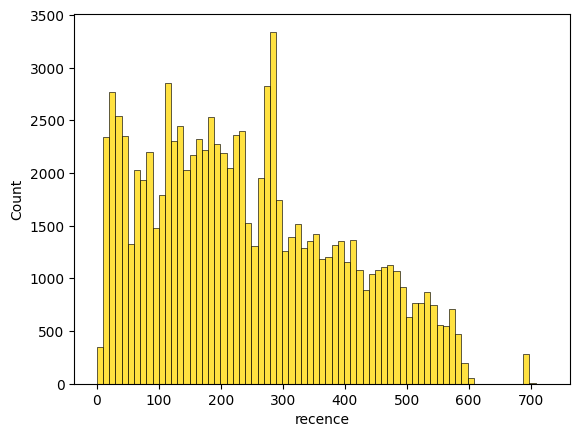

In [713]:
sns.histplot(rfms["recence"], kde=False, color=colors_list[0], binwidth=10)

Nous affichons la distribution de la frequence :

<Axes: xlabel='frequence', ylabel='Count'>

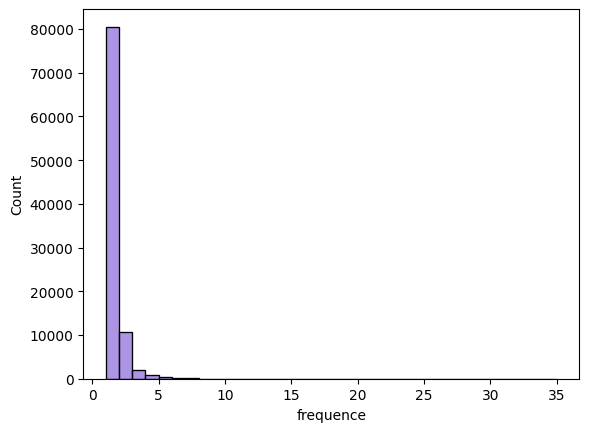

In [714]:
sns.histplot(rfms["frequence"], kde=False, color=colors_list[1], binwidth=1)

Nous affichons la distribution du montant :

<Axes: xlabel='montant', ylabel='Count'>

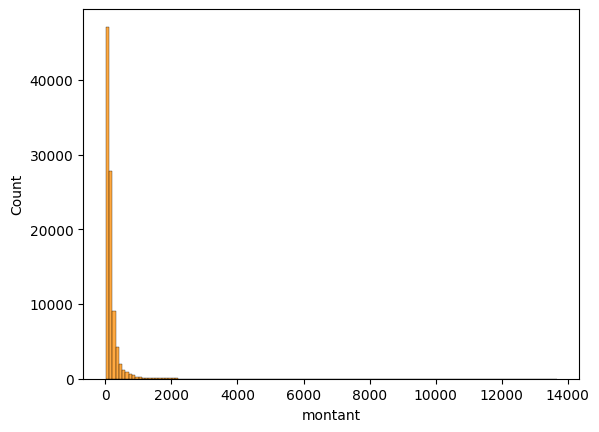

In [715]:
sns.histplot(rfms["montant"], kde=False, color=colors_list[2], binwidth=100)

Nous affichons la distribution de la satisfaction :

<Axes: xlabel='satisfaction', ylabel='Count'>

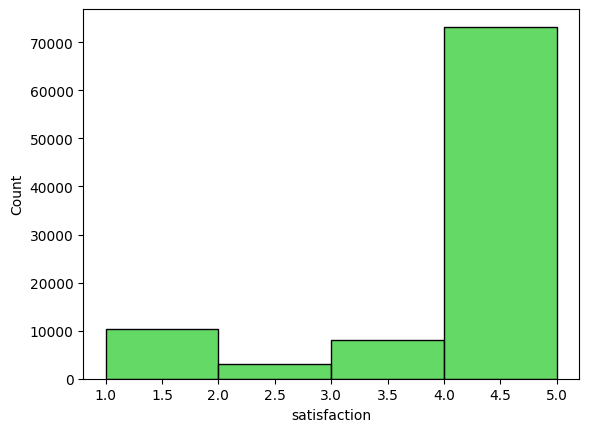

In [716]:
sns.histplot(rfms["satisfaction"], kde=False, color=colors_list[3], binwidth=1)

## <span style='background:yellow; color:black'>2/ Analyse bivariee</span>

Nous explorons les relations entre les variables grâce à une matrice de
correlation :

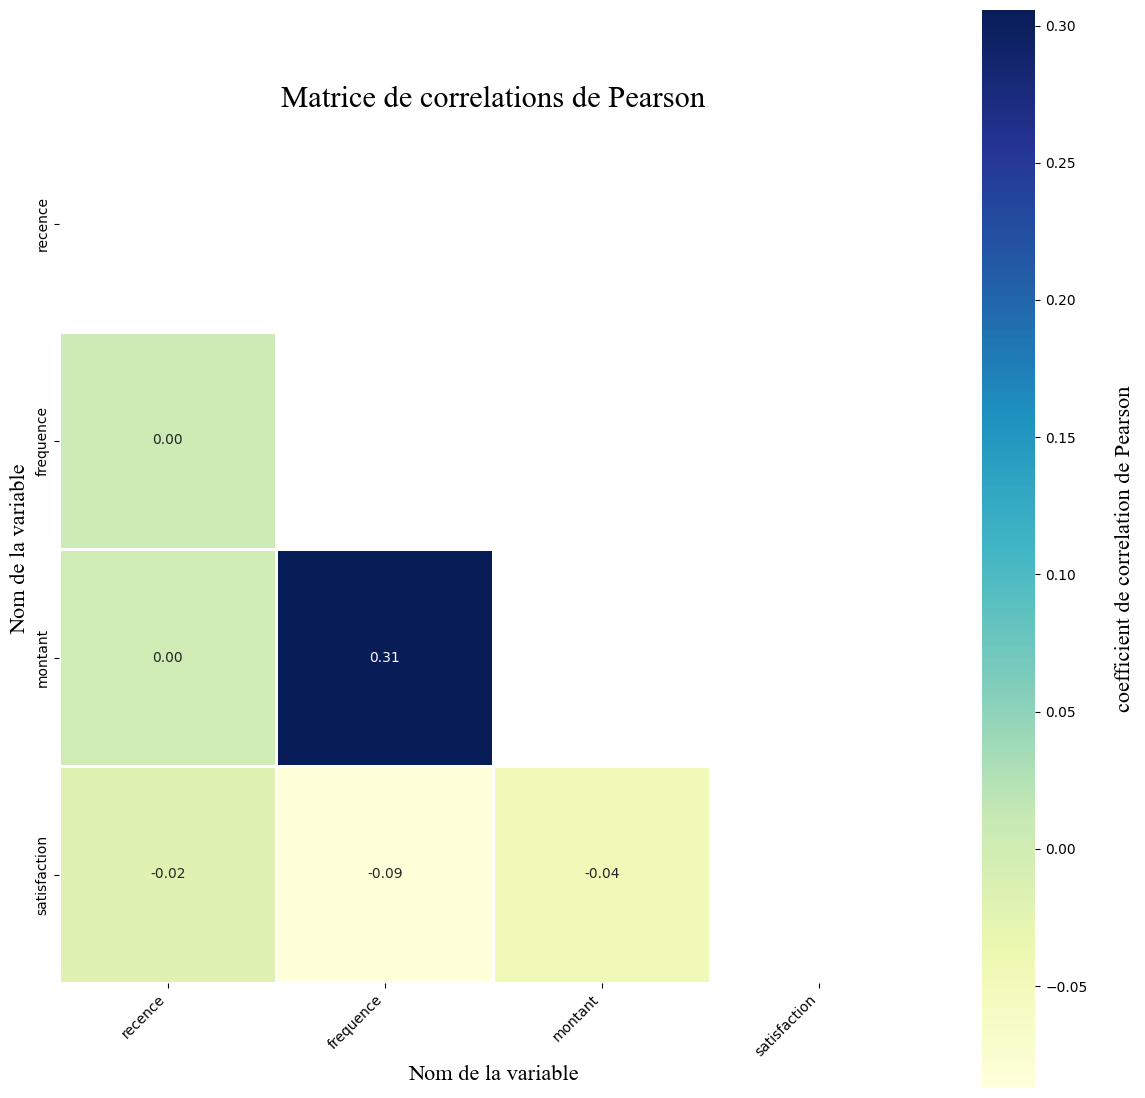

In [717]:
# matrice de correlation
corr_matrix = rfms.corr()

# Creer un masque pour masquer les valeurs au-dessus de la diagonale
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# heatmap
fig, ax = plt.subplots(figsize=(14, 14))
heatmap = sns.heatmap(
    corr_matrix,
    square=True,
    linewidths=1,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    mask=mask,
    ax=ax,
)

# Ajout du titre du graphique, des axes et de la colorbar
plt.title("Matrice de correlations de Pearson", fontdict=font_title)
plt.xlabel("Nom de la variable", fontdict=font_axe)
plt.ylabel("Nom de la variable", fontdict=font_axe)
plt.xticks(rotation=45, ha="right")
cbar = heatmap.collections[0].colorbar
cbar.set_label(
    "coefficient de correlation de Pearson",
    labelpad=20,
    fontdict=font_axe
)
plt.show()

Il n'y a pas de correlation forte entre les features. Nous remarquons
neanmoins une correlation moderee entre la frequence et le montant (r=0,31).

# <span style='background:blue'>Etape 4 : Exportation du dataset nettoye</span>
___

In [718]:
# Aperçu dataframe nettoye
affiche_aperçu_df(rfms, "rfms", "la segmentation RFM et satisfaction", 3)

Voici l'aspect de 'rfms' après la segmentation RFM et satisfaction


,recence,frequence,montant,satisfaction
customer_unique_id,,,,
0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.90,5.0
0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.19,4.0
0000f46a3911fa3c0805444483337064,541,1,86.22,3.0


94720 ligne(s) x 4 colonne(s)



Nous allons sauvegarder le dataset pour l'utiliser dans nos modèles de machine learning.

In [719]:
# Chemin du dossier et nom du fichier de l'export nettoye
output_directory = "data/cleaned"
nomFichier_export = "olist_clients_segmentation.csv"

# Verification de l'existence du dossier
os.makedirs(output_directory, exist_ok=True)

# Chemin complet du fichier export
output_file = os.path.join(output_directory, nomFichier_export)

# export df nettoye en CSV (tabulation en separateur)
rfms.to_csv(output_file, sep="\t", encoding="utf-8", index=True)

# <span style='background:blue'>Conclusion</span>

Le dataset fourni par Olist nous permet d'extraire les donnees des 97_916
clients qui ont dejà realise au moins 1 commande entre septembre 2016 et
septembre 2018. Sur cette periode, nous avons extrait la recence (date de
la dernière commande), la frequence (nombre de commande sur la periode), le
montant total des commandes (prix articles + prix de fret) et la satisfaction
de ces clients. Ces donnees sont exportees dans un fichier CSV pour être
utilisees dans nos modèles de machine learning.

In [720]:
# Afficher temps d'execution du notebook
calculer_duree_notebook(start_time)

Duree totale pour faire tourner le notebook : 0 minute(s) 43 seconde(s)
